# 1. Importação de bibliotecas e leitura dos dados

Para começar o tratamento e conhecimento dos dados, é necessário importá-los dos arquivos em que se encontram e também fazer a importação das bibliotecas que auxiliarão na criação do melhor modelo possível.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from category_encoders import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [4]:
df_test = pd.read_csv('test.csv')

# 2. Tratamento de valores nulos e outliers

Para tornar o conjunto de dados mais coeso e consistente, é necessário realizar o tratamento de valores que possam causar ruídos nos dados, como os faltantes ou fora do padrão de "normalidade" dos dados. Assim, foi realizado o tratamento de valores outliers e nulos presentes no dataframe.

## 2.2 Tratamento de valores nulos

In [5]:
""" valores_nulos = df_train[df_train.isnull().any(axis=1)]
df_train.isnull().sum()
df_train.dropna(inplace=True) """

' valores_nulos = df_train[df_train.isnull().any(axis=1)]\ndf_train.isnull().sum()\ndf_train.dropna(inplace=True) '

In [6]:
""" valores_nulos = df_test[df_test.isnull().any(axis=1)]
df_test.isnull().sum()
df_test.dropna(inplace=True) """

' valores_nulos = df_test[df_test.isnull().any(axis=1)]\ndf_test.isnull().sum()\ndf_test.dropna(inplace=True) '

# 3. Codificação das variáveis categóricas

Os computadores são máquinas que nem sempre conseguem entender variáveis categóricas, ou seja, aquelas que são expressas de outras formas além de números. Para isso, é necessário realizar uma encodificação - ou seja, transformar os valores de dados categóricos em dados numéricos para que o computador possa interpretá-los. O método escolhido foi o Label Encoder, ou seja, transforma cada um dos valores únicos em um número inteiro e sequencial.

## 3.1 Codificação das colunas no conjunto de treino

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Colunas categóricas a serem codificadas
categorical_columns = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Aplicar o LabelEncoder a cada coluna categórica
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

# Verificar o resultado
print(df_train.head())


   track_unique_id  track_id  artists  album_name  track_name  duration_ms  \
0            41996     64239    13481       18054       29483       211533   
1            76471     50962     7754       10815        1549       196000   
2            54809     60021    21526       28726       35849       216506   
3            16326     13905     8029       24834       25598       218346   
4           109799     35296    20008       26251       44199       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     1       0.0549      0.000058   
1     False         0.287  0.1900    7  ...     0       0.0370      0.930000   
2     False         0.583  0.5090    1  ...     1       0.0362      0.777000   
3     False         0.163  0.0368    8  ...     1       0.0472      0.991000   
4     False         0.647  0.9210    2  ...     1       0.1850      0.000939   

   instrumentalness  liveness  valence    tempo  t

## 3.2 Codificação das colunas no conjunto de teste

In [8]:
# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Colunas categóricas a serem codificadas
categorical_columns = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Aplicar o LabelEncoder a cada coluna categórica
for column in categorical_columns:
    df_test[column] = label_encoder.fit_transform(df_test[column])

# Verificar o resultado
print(df_test.head())


   track_unique_id  track_id  artists  album_name  track_name  duration_ms  \
0           113186     25507     5751       11698       15371       440247   
1            42819     10640     6116        7004        7331        93933   
2            59311     22435    14892       11747       19101       213578   
3            91368     28552     2086        1075       14049       151387   
4            61000     18449     9792       20017       27171       236293   

   explicit  danceability  energy  key  loudness  mode  speechiness  \
0     False         0.369   0.598    7    -6.984     1       0.0304   
1     False         0.171   0.997    7    -3.586     1       0.1180   
2     False         0.173   0.803    9   -10.071     0       0.1440   
3     False         0.683   0.511    6    -5.598     1       0.0279   
4     False         0.555   0.941    9    -3.294     0       0.0481   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0       0.00511        

# 4. Análise exploratória dos dados

Para conhecer melhor a relação entre os dados, é necessário realizar a análise exploratória dos mesmos. Essa análise consiste em entender quais as relações existentes entre os dados e encontrar insights que podem ajudar a compreender quais as features que mais afetam o conjunto de dados.

## 4.1 Análise da popularidade por gênero musical

In [9]:
plt.figure(figsize=(20, 6))
sns.barplot(x='track_genre', y='popularity_target', data=df_train)
plt.title('Popularidade por Gênero de Música')
plt.xticks(rotation=90)
plt.show()

## 4.2 Análise da popularidade por danceability

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame se chame df_train
# df_train = pd.read_csv('seu_arquivo.csv')  # Carregar seu DataFrame

# Calcular a média de danceability
danceability_mean = df_train['danceability'].mean()

# Criar uma nova coluna categórica com base na média de danceability
df_train['danceability_category'] = df_train['danceability'].apply(
    lambda x: 'Menor que Média' if x < danceability_mean else 'Maior que Média'
)

# Calcular a média de popularidade por categoria
popularity_by_danceability = df_train.groupby('danceability_category')['popularity_target'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='danceability_category', y='popularity_target', data=popularity_by_danceability, palette='viridis')
plt.title('Média de Popularidade por Categoria de Danceability')
plt.xlabel('Categoria de Danceability')
plt.ylabel('Média de Popularidade')
plt.xticks(rotation=0)  # Gira os rótulos do eixo x se necessário
plt.axhline(0.5, color='red', linestyle='--', label='Limite de Popularidade')
plt.legend()
plt.grid(True)
plt.show()


## 4.3 Análise da distribuição de dados entre as variáveis numéricas

In [11]:
# Definindo colunas numéricas e categóricas
numeric_cols = ['duration_ms', 'danceability', 'energy', 'loudness', 
                'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo']
categorical_cols = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Criar gráficos para colunas numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='popularity_target', y=col, data=df_train)
    plt.title(f'Boxplot de {col} por Popularidade')
    plt.xlabel('Popularidade (0: Não Popular, 1: Popular)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


## 4.4 Análise da distribuição de dados pelas variáveis categóricas

In [12]:
# Criar gráficos para colunas categóricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=col, y='popularity_target', data=df_train, estimator=lambda x: sum(x)/len(x))
    plt.title(f'Média de Popularidade por {col}')
    plt.xlabel(col)
    plt.ylabel('Média de Popularidade')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

" # Criar gráficos para colunas categóricas\nplt.figure(figsize=(15, 10))\nfor i, col in enumerate(categorical_cols):\n    plt.subplot(2, 3, i + 1)\n    sns.barplot(x=col, y='popularity_target', data=df_train, estimator=lambda x: sum(x)/len(x))\n    plt.title(f'Média de Popularidade por {col}')\n    plt.xlabel(col)\n    plt.ylabel('Média de Popularidade')\n    plt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show() "

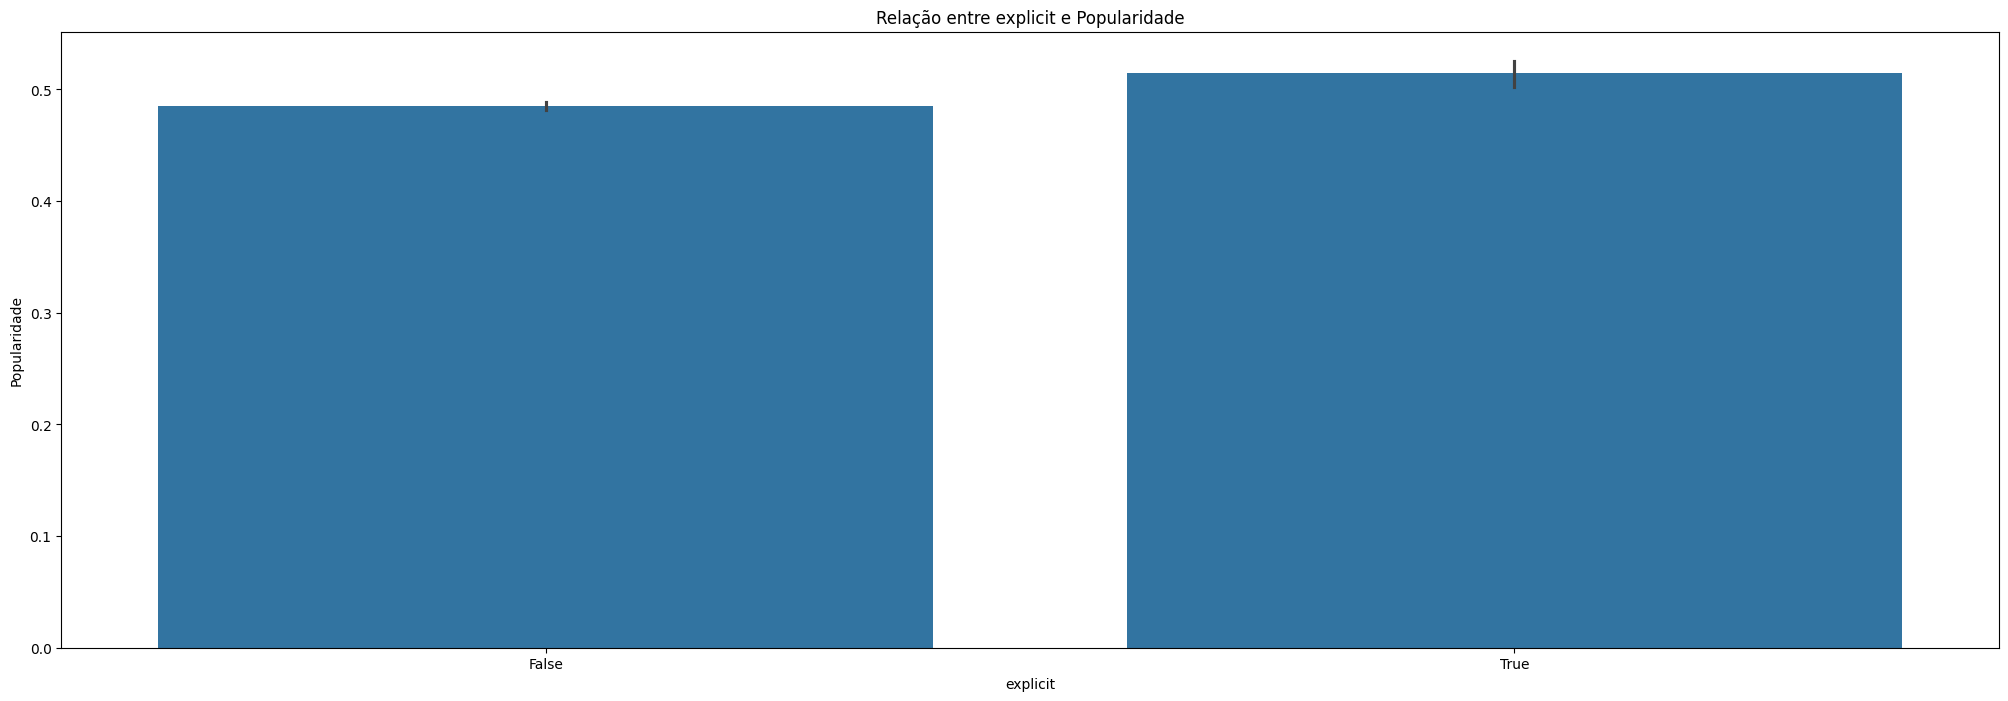

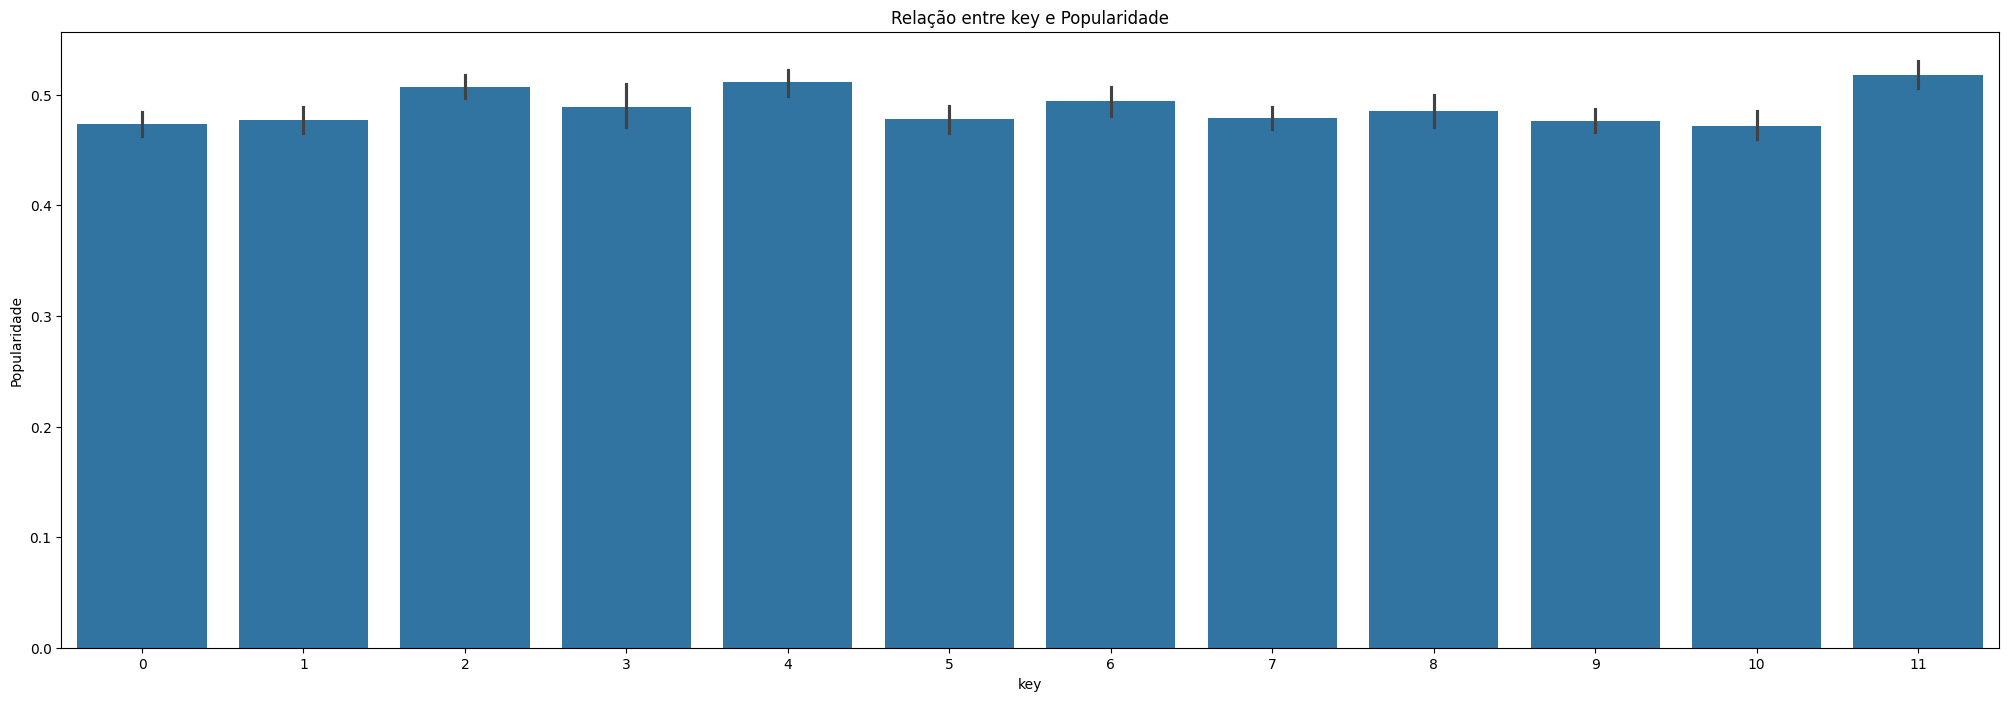

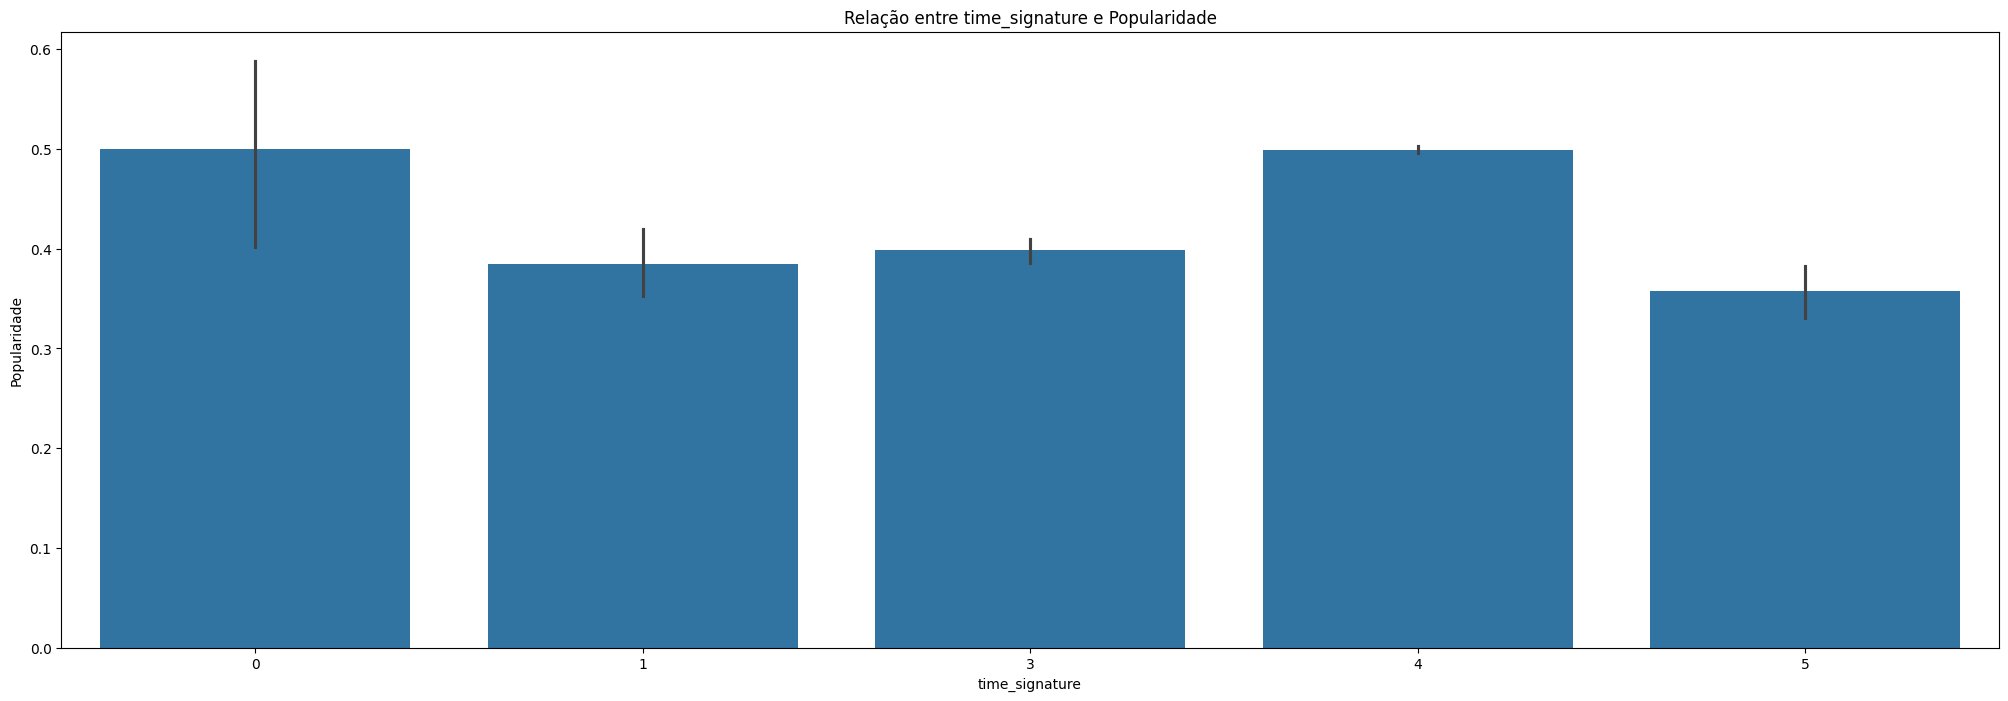

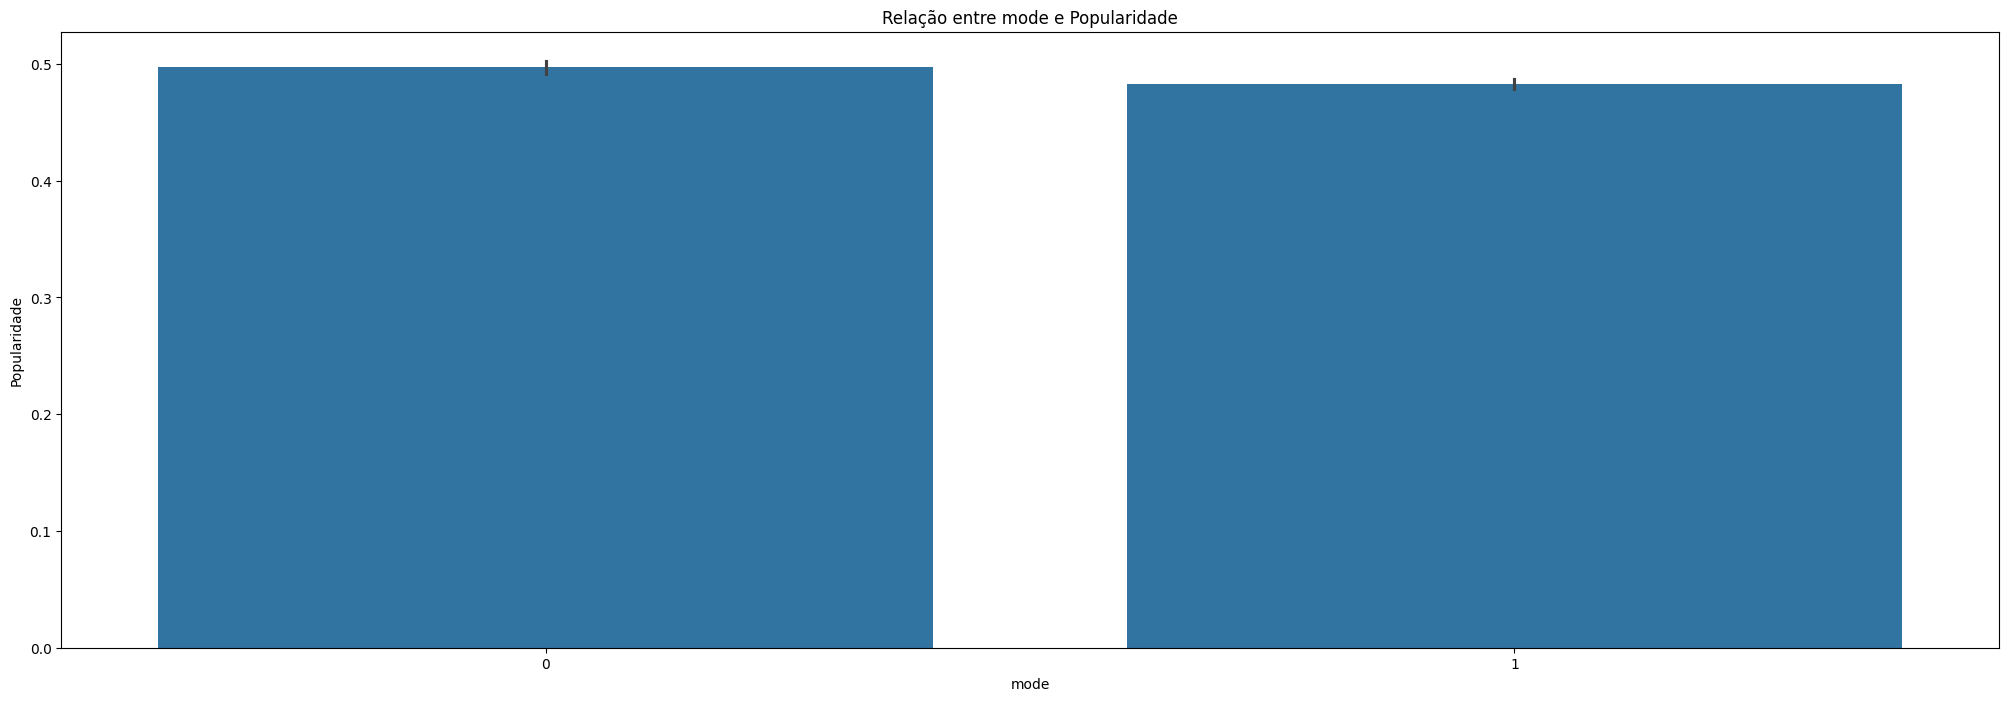

In [13]:
# Contagem de popularidade para algumas features categóricas
for col in [
    'explicit',
    'key',
    'time_signature',
    'mode']:
    plt.figure(figsize=(25, 8))
    sns.barplot(x=col, y='popularity_target', data=df_train)
    plt.title(f'Relação entre {col} e Popularidade')
    plt.xlabel(col)
    plt.ylabel('Popularidade')
    plt.show()


In [14]:
df_train.loc[df_train['popularity_target'] == 1, 'track_genre'].unique()

array([ 54,  80,   0,  83,  35,  74,  33,  29,  21,  57,   6,  81,  17,
        48, 106,  15,  87,  12, 111,  90,  19,  39,  38,  41,  69,  23,
        34,  22,  47,  55,  77,   9,  86,  79, 110,  56,  40, 101,  97,
        63,  89,  68, 107,  32,  94, 102,  85,  37,   2,  24,  96,   8,
        36,  51,  65,  72,  71,  58,  11, 104,  82,  27,  98,  14,   4,
        99,  20,  10,  62, 113,  70,  30, 100,  16,  45,  26,  67,  92,
         5,  84,  53,  49,  28,  73,   3,  91, 103,  25, 109, 105,  44,
        52,  64,  88,  60,  43,  31, 112,   1,  75,  95,   7,  61,  50,
        76,  78,  46,  18,  42,  66,  13, 108])

In [15]:
# Filtrar as músicas com popularity_target igual a 1
df_popular = df_train[df_train['popularity_target'] == 1]

# Contar quantas músicas de cada track_genre existem com popularity = 1
genre_count = df_popular.groupby('track_genre').size().sort_values(ascending=False)
explicit_count = df_popular.groupby('explicit').size().sort_values(ascending=False)
danceability_count = df_popular.groupby('danceability').size().sort_values(ascending=False)
valence_count = df_popular.groupby('valence').size().sort_values(ascending=False)
instrumentalness_count = df_popular.groupby('instrumentalness').size().sort_values(ascending=False)
energy_count = df_popular.groupby('energy').size().sort_values(ascending=False)
acousticness_count = df_popular.groupby('acousticness').size().sort_values(ascending=False)

genre_count.head(20)


track_genre
40     701
94     701
35     697
112    688
74     688
97     684
55     681
9      677
77     677
15     667
81     658
65     654
96     635
5      635
83     606
29     577
113    569
23     567
4      564
87     562
dtype: int64

In [16]:
explicit_count

explicit
False    35412
True      3518
dtype: int64

In [17]:
danceability_count.head(50)

danceability
0.521    120
0.639    119
0.533    119
0.647    116
0.598    115
0.649    114
0.651    114
0.602    114
0.560    113
0.661    112
0.603    112
0.509    111
0.607    110
0.545    109
0.671    109
0.592    108
0.541    108
0.609    108
0.576    107
0.573    107
0.682    107
0.633    107
0.662    107
0.650    106
0.534    106
0.653    106
0.486    106
0.670    105
0.636    105
0.568    105
0.687    105
0.643    104
0.690    104
0.489    103
0.606    103
0.648    103
0.714    103
0.657    103
0.579    102
0.629    102
0.608    102
0.631    102
0.591    102
0.550    101
0.586    100
0.495    100
0.616    100
0.593    100
0.590    100
0.554    100
dtype: int64

In [18]:
valence_count.head(20)

valence
0.962    80
0.486    79
0.215    78
0.342    74
0.400    73
0.183    71
0.336    71
0.380    71
0.352    71
0.435    71
0.238    71
0.332    70
0.453    70
0.695    70
0.193    69
0.446    69
0.619    69
0.475    68
0.249    68
0.308    67
dtype: int64

In [19]:
instrumentalness_count.head(20)

instrumentalness
0.000    14551
0.929       41
0.895       37
0.905       36
0.901       36
0.900       35
0.916       33
0.897       32
0.907       32
0.927       32
0.942       32
0.938       32
0.933       32
0.910       32
0.906       32
0.913       31
0.934       31
0.915       31
0.877       30
0.878       30
dtype: int64

In [20]:
energy_count.head(20)

energy
0.670    96
0.892    92
0.720    89
0.886    85
0.823    85
0.857    84
0.850    82
0.828    82
0.920    82
0.802    81
0.871    81
0.869    81
0.687    80
0.737    80
0.873    79
0.564    78
0.953    78
0.864    78
0.716    78
0.743    78
dtype: int64

In [21]:
acousticness_count.head(30)

acousticness
0.995    80
0.157    70
0.992    70
0.994    67
0.101    62
0.102    61
0.109    61
0.108    60
0.993    60
0.191    58
0.991    57
0.105    55
0.129    55
0.124    54
0.111    54
0.110    52
0.142    52
0.107    51
0.132    51
0.114    51
0.178    50
0.158    50
0.118    50
0.119    50
0.172    50
0.145    50
0.106    49
0.777    48
0.120    48
0.168    48
dtype: int64

# 5. Construção de hipóteses

## Hipótese 1: músicas sem falas explícitas têm maiores chances de fazer sucesso.

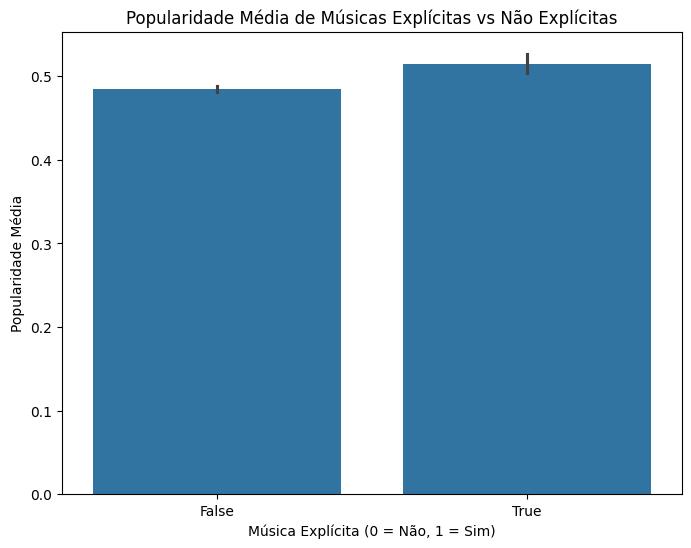

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para a Hipótese 1
plt.figure(figsize=(8,6))
sns.barplot(x='explicit', y='popularity_target', data=df_train)
plt.title('Popularidade Média de Músicas Explícitas vs Não Explícitas')
plt.xlabel('Música Explícita (0 = Não, 1 = Sim)')
plt.ylabel('Popularidade Média')
plt.show()


## Hipótese 2: músicas com vocais têm maiores chances de fazer sucesso.

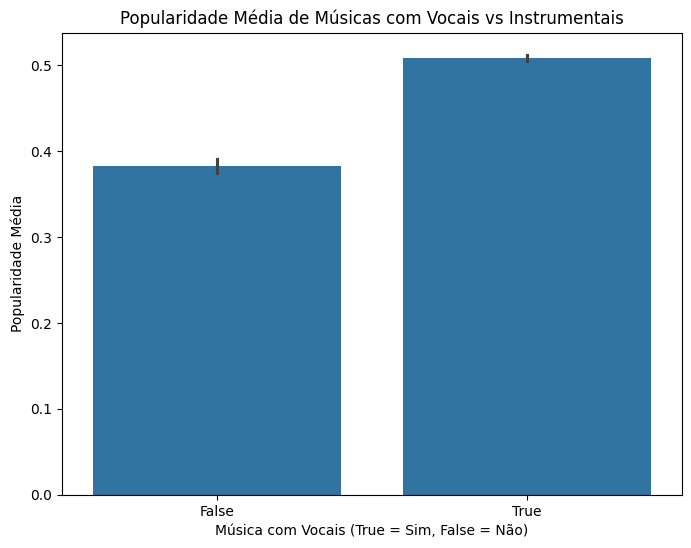

In [23]:
# Gráfico de barras para a Hipótese 2
plt.figure(figsize=(8,6))
df_train['vocal_presence'] = df_train['instrumentalness'] < 0.5  # Considerar músicas com vocal se instrumentalness < 0.5
sns.barplot(x='vocal_presence', y='popularity_target', data=df_train)
plt.title('Popularidade Média de Músicas com Vocais vs Instrumentais')
plt.xlabel('Música com Vocais (True = Sim, False = Não)')
plt.ylabel('Popularidade Média')
plt.show()


## Hipótese 3: músicas não acústicas têm maiores chances de fazer sucesso.

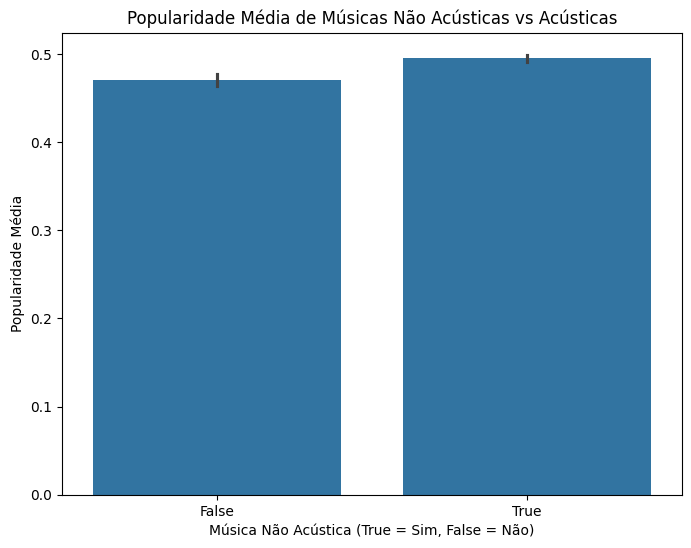

In [24]:
# Gráfico de barras para a Hipótese 3
plt.figure(figsize=(8,6))
df_train['non_acoustic'] = df_train['acousticness'] < 0.5  # Considerar música não acústica se acousticness < 0.5
sns.barplot(x='non_acoustic', y='popularity_target', data=df_train)
plt.title('Popularidade Média de Músicas Não Acústicas vs Acústicas')
plt.xlabel('Música Não Acústica (True = Sim, False = Não)')
plt.ylabel('Popularidade Média')
plt.show()


Após definir as 3 hipóteses, foram selecionadas as features mais importantes e que seriam utilizadas para a criação e desenvolvimento do modelo de predição da popularidade.

In [25]:
features_selecionadas = [
    'loudness',
    'explicit',
    'instrumentalness',
    'track_genre',
    'acousticness',
    'valence',
    'speechiness',
    'danceability'
]

# 6. Construção do modelo

Para escolher o melhor modelo, foram escolhidos 4 tipos de modelos supervisionados para comparação de métricas e decisão de qual modelo seguir: Regressão Logística, GradientBoost, Random Forest e KNN (K-Nearest Neighbors).

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Supondo que df_train e df_test já estejam processados
X_train = df_train[features_selecionadas]
y_train = df_train['popularity_target']
X_test = df_test[features_selecionadas]

# Dividir os dados de treino em treino e validação
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Lista de modelos a serem testados
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'KNN': KNeighborsClassifier()
# }

# # Dicionário para armazenar as acurácias
# accuracies = {}

# # Treinando e avaliando cada modelo
# for model_name, model in models.items():
#     # Treinar o modelo
#     model.fit(X_train_split, y_train_split)
    
#     # Fazer predições no conjunto de validação
#     y_val_pred = model.predict(X_val_split)
    
#     # Calcular a acurácia e outras métricas
#     accuracy = accuracy_score(y_val_split, y_val_pred)
#     f1 = f1_score(y_val_split, y_val_pred)
#     accuracies[model_name] = {'Acurácia': accuracy, 'F1-Score': f1}
    
#     print(f"Acurácia do {model_name}: {accuracy:.4f}")
#     print(f"F1-Score do {model_name}: {f1:.4f}\n")
#     print(classification_report(y_val_split, y_val_pred))

# # Gerar predições para o df_test
# melhor_modelo = RandomForestClassifier(random_state=42)
# melhor_modelo.fit(X_train, y_train)  # Treinar o melhor modelo em todo o conjunto de treino
# y_test_pred = melhor_modelo.predict(X_test)  # Fazer predições no df_test

# # Criar o DataFrame de submissão
# submission = pd.DataFrame({
#     'track_unique_id': df_test['track_unique_id'],
#     'popularity_target_pred': y_test_pred
# })

# print(submission.head())  # Visualizar as primeiras linhas do DataFrame de submissão


Após testar os modelos e analisar a acurácia e o f1-score, o modelo escolhido para seguir com o desenvolvimento foi o RandomForest.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Definir o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
rf.fit(X_train_split, y_train_split)

# Fazer predições no conjunto de validação
y_val_pred = rf.predict(X_val_split)

# Avaliar o modelo no conjunto de validação
accuracy = accuracy_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
print(f"Acurácia (validação): {accuracy:.4f}")
print(f"F1-Score (validação): {f1:.4f}")
print("\nRelatório de Classificação (validação):")
print(classification_report(y_val_split, y_val_pred))

# Matriz de Confusão
print("Matriz de Confusão (validação):")
print(confusion_matrix(y_val_split, y_val_pred))

# Fazer predições no conjunto df_test
y_test_pred = rf.predict(X_test)

# Criar o DataFrame de submissão com track_unique_id e as predições de popularidade
submission = pd.DataFrame({
    'track_unique_id': df_test['track_unique_id'],
    'popularity_target': y_test_pred  # Adicionada a vírgula faltante
})

print(submission.head())  # Visualizar as primeiras linhas do DataFrame de submissão


Acurácia (validação): 0.7960
F1-Score (validação): 0.7910

Relatório de Classificação (validação):
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8247
           1       0.78      0.80      0.79      7713

    accuracy                           0.80     15960
   macro avg       0.80      0.80      0.80     15960
weighted avg       0.80      0.80      0.80     15960

Matriz de Confusão (validação):
[[6542 1705]
 [1551 6162]]
   track_unique_id  popularity_target
0           113186                  1
1            42819                  0
2            59311                  0
3            91368                  0
4            61000                  0


# 7. Ajuste fino de hiperparâmetros

O ajuste fino de hiperparâmetros envolve um processo de encontrar quais configurações externas (e escolhidas manualmente) têm a melhor combinação que faça o modelo performar melhor. Para isso, existem diferentes ferramentas e algoritmos que podem ser utilizados para encontrar as melhores combinações, e o escolhido foi o RandomizedSearch, que realiza um certo número de combinações de hiperparâmetros aleatoriamente e traz um resultado aproximado.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definir o modelo base
rf = RandomForestClassifier(random_state=42)

# Definir a grade de hiperparâmetros para o RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar o RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, 
                                      param_distributions=param_distributions, 
                                      n_iter=100, 
                                      cv=3, 
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs=-1)

# Treinar o RandomizedSearchCV no conjunto de treino
random_search_rf.fit(X_train_split, y_train_split)

# Imprimir os melhores hiperparâmetros encontrados
print(f"Melhores Hiperparâmetros: {random_search_rf.best_params_}")

# Fazer predições no conjunto de validação
y_val_pred = random_search_rf.predict(X_val_split)

# Avaliar o modelo no conjunto de validação
accuracy = accuracy_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
print(f"Acurácia (validação): {accuracy:.4f}")
print(f"F1-Score (validação): {f1:.4f}")
print("\nRelatório de Classificação (validação):")
print(classification_report(y_val_split, y_val_pred))

# Fazer predições no conjunto df_test
y_test_pred = random_search_rf.predict(X_test)

# Criar o DataFrame de submissão com track_unique_id e as predições de popularidade
submission = pd.DataFrame({
    'track_unique_id': df_test['track_unique_id'],
    'popularity_target_pred': y_test_pred
})

print(submission.head())  # Visualizar as primeiras linhas do DataFrame de submissão


Por conta do pequeno poder computacional e grande demanda de tempo para rodar o algoritmo de fine tuning, não foi possível encontrar os melhor hiperparâmetros por meio do RandomizedSearch.

# 8. Exportação do dataframe final e conclusão

In [31]:
submission.to_csv('submission.csv', index=False)


In [32]:
submission.shape

(34200, 2)